# HowTo Handle Image

In [1]:
import tensorflow as tf

/home/nokia-du/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Use matplotlib to show image

In [60]:
import matplotlib
from matplotlib.pyplot import imshow
%matplotlib inline

In [8]:
# origin file
image_file = '../datasets/lfw/lfw_mtcnnpy_160/Aaron_Guiel/Aaron_Guiel_0001.png'

### 1. Use Scipy to read and show image

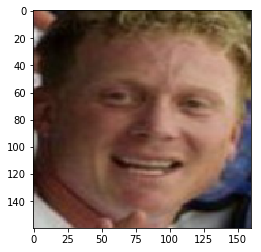

In [6]:
import scipy.misc

image1 = scipy.misc.imread(image_file)
imshow(image1)

### 2. Use Tensor to read and show image

http://www.tensorflow.org/api_guides/python/image


#### Decode Image
- tf.image.decode_gif
- tf.image.decode_jpeg
- tf.image.decode_png
- tf.image.decode_image

#### Encode Image
- tf.image.encode_jpeg
- tf.image.encode_png

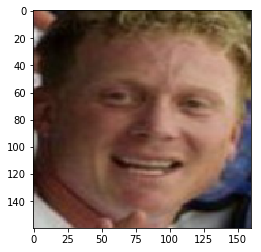

In [37]:
tf_image_file = tf.read_file(image_file)

# You can specify image type by using tf.image.decode_png(tf.image_PNG_file) or 
# tf.image.decode_xxx(tf.image_XXX_file),
# You can also specify channel number, default is 0 (Number of color channels for the decoded image) 
image2 = tf.image.decode_image(tf_image_file, channels=3)

# Image should be run under a session
with tf.Session() as sess:
    imshow(sess.run(image2))

In [38]:
# The shape will be 1-D if using tf.image.decode_image()
image2.shape

TensorShape(None)

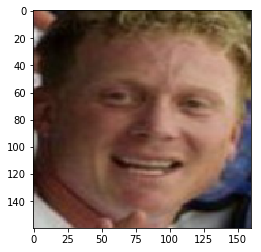

In [84]:
# Use tf.image.decode_png to get correct shape
image3 = tf.image.decode_png(tf_image_file)

with tf.Session() as sess:
    imshow(sess.run(image3))

In [40]:
# The shape will be 3-D if using tf.image.decode_xxx()
image3.shape

TensorShape([Dimension(None), Dimension(None), Dimension(None)])

# 3. Resizing

- tf.image.resize_images
- tf.image.resize_area
- tf.image.resize_bicubic
- tf.image.resizebilinear
- tf.image.resize_nearest_neighbor
- **tf.image.resize_image_with_crop_or_pad**

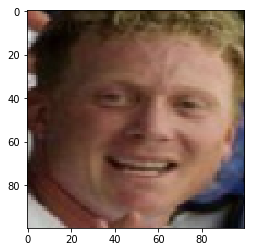

In [43]:
# You should reshape if using tf.image.decode_image()
image_resize_images1 = tf.image.resize_images(tf.reshape(image2, [160,160, 3]), [100, 100], method = 1)

with tf.Session() as sess:
    imshow(sess.run(image_resize_images1))

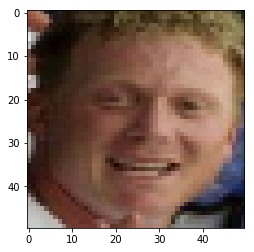

In [47]:
# You don't need to reshape if using tf.image.decode_xxx()
image_resize_image2 = tf.image.resize_images(image3, [50, 50], method = 1)

with tf.Session() as sess:
    imshow(sess.run(image_resize_image2))

### 4. Cropping
- tf.image.resize_image_with_crop_or_pad
- tf.image.central_crop
- tf.image.pad_to_bounding_box
- tf.image.crop_to_bounding_box
- tf.image.extract_glimpse
- tf.image.crop_and_resize

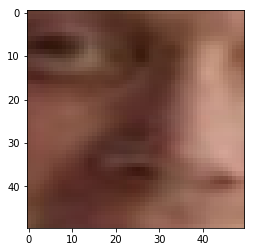

In [48]:
image_cropping1 = tf.image.resize_image_with_crop_or_pad(image3, 50, 50)

with tf.Session() as sess:
    imshow(sess.run(image_cropping1))

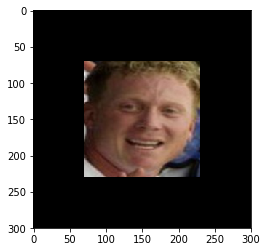

In [49]:
image_cropping2 = tf.image.resize_image_with_crop_or_pad(image3, 300, 300)

with tf.Session() as sess:
    imshow(sess.run(image_cropping2))

### 5. Flipping, Rotating and Transposing
- tf.image.flip_up_down
- tf.image.random_flip_up_down
- tf.image.flip_left_right
- tf.image.random_flip_left_right
- tf.image.transpose_image
- tf.image.rot90

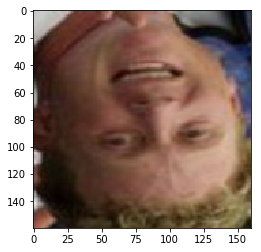

In [50]:
image_flip = tf.image.flip_up_down(image3)

with tf.Session() as sess:
    imshow(sess.run(image_flip))

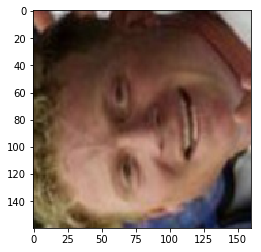

In [51]:
image_transpose = tf.image.transpose_image(image3)

with tf.Session() as sess:
    imshow(sess.run(image_transpose))

### 6. Converting Between Colorspaces

- tf.image.rgb_to_grayscale
- tf.image.grayscale_to_rgb
- tf.image.rgb_to_hsv
- tf.image.hsv_to_rgb
- tf.image.convert_image_dtype

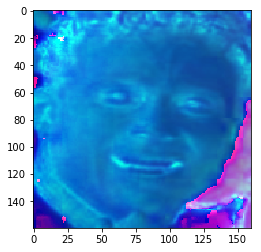

In [107]:
# dtype of image3 is tf.uint8, cast to tf.float32, so that you can convert rgb to hsv
image3_float32 = tf.cast(image3, dtype=tf.float32)
image_hsv = tf.image.rgb_to_hsv(image3_float32)
image_hsv = tf.image.convert_image_dtype(image_hsv, tf.uint8)

with tf.Session() as sess:
    imshow(sess.run(image_hsv))

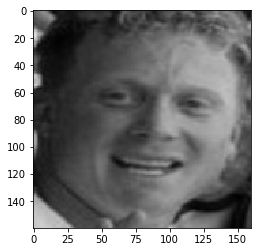

In [111]:
# Because the shape of image_gray is [h, w, 1] and imshow will got a TypeError: Invalid dimensions for image data
# So convert twice to let imshow could disply image correctly.
image_gray = tf.image.rgb_to_grayscale(image3)
image_gray = tf.image.grayscale_to_rgb(image_gray)

with tf.Session() as sess:
    imshow(sess.run(image_gray))

### 7. Image Adjustments
- tf.image.adjust_brightness
- tf.image.random_brightness
- tf.image.adjust_contrast
- tf.image.random_contrast
- tf.image.adjust_hue
- tf.image.random_hue
- tf.image.adjust_gamma
- tf.image.adjust_saturation
- tf.image.random_saturation
- tf.image.per_image_standarization

### 8. Working with Bounding Boxes
- tf.image.draw_bounding_boxes
- tf.image.non_max_suppression
- tf.image.sample_distorted_bounding_box

### 9. Denoising
- tf.image.total_variation